# Intro to Pandas

<h4> May 9, 2022 </h4>

Pandas is a package designed to help with data and data structures - data I/O, sorting, selection. We'll cover the very basics, and for everything else check out the pandas website: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

The first thing to note is that there are two main "structures" or object types/classes in pandas: series, and dataframes.

Series are typically for one-dimensional data; Dataframes are for multi-dimensional data. Both are aligned with "indices" - so for series, each entry has a different index, and for dataframes the rows are aligned with indices.

The index is inherent/associated with that entry of data. If you read data in, then select a subset of that data, those data then have the original indices that you read them in with - unless you specifically say to re-index them.

The things we'll go over:

    1. Read data in with pandas
    2. Selecting and making new data types with dataframes
    3. Converting to arrays
    4. Data out with dataframes
    
We'll use the files from last class as an example.

In [1]:
## Packages
import numpy as np
import pandas as pd


## File paths:
quakes_path = 'C:\\Users\\vjs\\data_for_class\\quakes_win.txt'

eugprecip_path = 'C:\\Users\\vjs\\data_for_class\\eugene_precipitation_for_windows.txt'

In [5]:
## Try making a Series object.
## We give "Series" a list of items:
s = pd.Series([1,3,5,np.nan,6, 8])
print(s)

s2 = pd.Series(np.array([13,75,3,7]))
print(s2)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
0    13
1    75
2     3
3     7
dtype: int32


Note that this doesn't look like an array. There's a left hand column with numbers starting at 0 - that's the index.

Also  note that it forces all the values in the series to be the same data type.

How do we make a dataframe from scratch?

In [8]:
## 1- We use pd.DataFrame a 2d array:
array2d = np.array([[0,32,56,8,489],[12,98,671,23,5]])

df = pd.DataFrame(array2d)
print(df)

    0   1    2   3    4
0   0  32   56   8  489
1  12  98  671  23    5


Notice this gave each row an index, like above; it also gave the column direction a name, startin with 0 (like an inde).

We can also give it a 2d array, but force it to have specific indices and columns...

In [10]:
dates = pd.date_range('20130101',periods=6)
print(dates)

## Then give the DataFrame function an array that's random with 6 rows,4 columns - and give it the "dates" series as the index
##    instead of the defualt 0, 1, 2,....
## We'll also give it column names with a list.

df2 = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
print(df2)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -0.975670  0.857840  0.439145  1.227045
2013-01-02  0.777939 -1.547872 -0.188550 -0.430057
2013-01-03 -0.319124  1.877557  0.749638 -1.535802
2013-01-04 -0.794608 -0.004781  1.804255  0.786184
2013-01-05  1.326036 -0.860742  0.319162 -1.959354
2013-01-06  0.212641  0.258263 -0.326810  0.837121


We can see that the index is now a datetime object, and the column names are A, B, C, D.

We can also make a dataframe with a python dictionary...

In [17]:
## 2 - Make a dictionary, and convert it to a DataFrame.
##  Key thing: you can combine datatypes into one dataframe.

mydict = {'A':1., 'B':pd.Timestamp('20130102'), 'C':pd.Series(1,index=list(range(4)), dtype='float32'), 
          'D':np.array([3]*4,dtype='int32'),
         'E':pd.Categorical(['test','train','test','train']),
         'F':'foo'}

print(mydict)

## Make a dataframe:
df3 = pd.DataFrame(mydict)
print(df3)

{'A': 1.0, 'B': Timestamp('2013-01-02 00:00:00'), 'C': 0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32, 'D': array([3, 3, 3, 3]), 'E': [test, train, test, train]
Categories (2, object): [test, train], 'F': 'foo'}
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


## Data Input/Output


Reading in data with pandas...

In [20]:
## Use read_csv

## Start with earthquake data:
quakedf = pd.read_csv(quakes_path)
#print(quakedf)

## Note - this read it in with one column, because it assumed the columns were comma delimited.
## But these are tab delimited, so we haev to tell the function that...

quakedf = pd.read_csv(quakes_path,delimiter='\t')
print(quakedf)

                          #time  latitude  longitude   depth  mag magType  \
0      2018-03-05T22:16:58.450Z   -6.6714    35.3528   10.00  4.5      mb   
1      2018-03-05T18:33:56.450Z  -19.3775  -179.0281  668.23  4.7      mb   
2      2018-03-05T15:42:42.630Z   52.5960   160.4379   16.96  5.1     mww   
3      2018-03-05T13:08:06.560Z  -41.0834   -92.1317   10.00  4.5      mb   
4      2018-03-05T11:47:15.400Z   -6.5249   143.1115   24.74  4.7      mb   
...                         ...       ...        ...     ...  ...     ...   
19955  2015-04-26T04:58:40.040Z   27.9966    84.7082   10.00  4.5      mb   
19956  2015-04-26T02:48:39.070Z   28.2272    84.5858   10.00  4.5      mb   
19957  2015-04-26T02:17:59.680Z  -21.2319  -179.1655  598.11  4.6      mb   
19958  2015-04-26T00:41:45.060Z   12.8728   143.6572  107.17  4.7      mb   
19959  2015-04-26T00:23:52.760Z  -19.8333  -177.7779  487.36  5.1      mb   

       nst    gap    dmin   rms  ...                   updated  \
0      Na

In [22]:
## How do we know what the column names are?
## list the column names using list
list(quakedf)

['#time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource']

In [25]:
## IF we wanted to know all the values in the 4th row of this dataframe:
quakedf

,#time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-03-05T22:16:58.450Z,-6.6714,35.3528,10.00,4.5,mb,NaN,90.0,5.053,0.80,...,2018-03-05T22:35:57.040Z,69km SW of Dodoma\t Tanzania,earthquake,8.2,1.9,0.156,12.0,reviewed,us,us
1,2018-03-05T18:33:56.450Z,-19.3775,-179.0281,668.23,4.7,mb,NaN,43.0,3.210,0.97,...,2018-03-05T19:03:42.040Z,144km NNW of Ndoi Island\t Fiji,earthquake,8.3,7.7,0.033,285.0,reviewed,us,us
2,2018-03-05T15:42:42.630Z,52.5960,160.4379,16.96,5.1,mww,NaN,92.0,1.166,1.00,...,2018-03-05T16:52:37.040Z,130km ESE of Petropavlovsk-Kamchatskiy\t Russia,earthquake,8.9,3.4,0.075,17.0,reviewed,us,us
3,2018-03-05T13:08:06.560Z,-41.0834,-92.1317,10.00,4.5,mb,NaN,183.0,14.696,0.74,...,2018-03-05T14:35:50.040Z,Southeast of Easter Island,earthquake,16.0,2.0,0.099,30.0,reviewed,us,us
4,2018-03-05T11:47:15.400Z,-6.5249,143.1115,24.74,4.7,mb,NaN,77.0,4.925,0.85,...,2018-03-05T12:09:02.040Z,71km WSW of Mendi\t Papua New Guinea,earthquake,9.5,6.1,0.085,42.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,2015-04-26T04:58:40.040Z,27.9966,84.7082,10.00,4.5,mb,NaN,125.0,1.860,1.05,...,2015-07-03T00:23:41.040Z,41km SE of Lamjung\t Nepal,earthquake,9.5,1.9,0.086,42.0,reviewed,us,us
19956,2015-04-26T02:48:39.070Z,28.2272,84.5858,10.00,4.5,mb,NaN,62.0,1.984,0.87,...,2015-07-03T00:23:41.040Z,21km E of Lamjung\t Nepal,earthquake,8.7,1.9,0.065,70.0,reviewed,us,us
19957,2015-04-26T02:17:59.680Z,-21.2319,-179.1655,598.11,4.6,mb,NaN,30.0,4.349,0.86,...,2015-07-03T00:23:41.040Z,80km SW of Ndoi Island\t Fiji,earthquake,9.9,5.9,0.041,178.0,reviewed,us,us
19958,2015-04-26T00:41:45.060Z,12.8728,143.6572,107.17,4.7,mb,NaN,41.0,1.377,0.49,...,2015-07-03T00:23:41.040Z,118km WSW of Merizo Village\t Guam,earthquake,8.8,5.7,0.051,117.0,reviewed,us,us


In [29]:
## give the first row of the dataframe:
quakedf[0:1]

## give the first 4 rows of the dataframe:
quakedf.head(4)

,#time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-03-05T22:16:58.450Z,-6.6714,35.3528,10.00,4.5,mb,NaN,90.0,5.053,0.80,...,2018-03-05T22:35:57.040Z,69km SW of Dodoma\t Tanzania,earthquake,8.2,1.9,0.156,12.0,reviewed,us,us
1,2018-03-05T18:33:56.450Z,-19.3775,-179.0281,668.23,4.7,mb,NaN,43.0,3.210,0.97,...,2018-03-05T19:03:42.040Z,144km NNW of Ndoi Island\t Fiji,earthquake,8.3,7.7,0.033,285.0,reviewed,us,us
2,2018-03-05T15:42:42.630Z,52.5960,160.4379,16.96,5.1,mww,NaN,92.0,1.166,1.00,...,2018-03-05T16:52:37.040Z,130km ESE of Petropavlovsk-Kamchatskiy\t Russia,earthquake,8.9,3.4,0.075,17.0,reviewed,us,us
3,2018-03-05T13:08:06.560Z,-41.0834,-92.1317,10.00,4.5,mb,NaN,183.0,14.696,0.74,...,2018-03-05T14:35:50.040Z,Southeast of Easter Island,earthquake,16.0,2.0,0.099,30.0,reviewed,us,us


In [33]:
## Let's say we wanted to make a plot fo the locations of these earthquakes...
import matplotlib.pyplot as plt

## Reference a column - using ., or ['']
lon = quakedf.longitude
print(lon)

## This gives a pandas serires, not array...
lon = quakedf.longitude.values
print(lon)


## need to get the latitude using an alternative way to reference columns:
lat = quakedf['latitude'].values
print(lat)

0         35.3528
1       -179.0281
2        160.4379
3        -92.1317
4        143.1115
           ...   
19955     84.7082
19956     84.5858
19957   -179.1655
19958    143.6572
19959   -177.7779
Name: longitude, Length: 19960, dtype: float64
[  35.3528 -179.0281  160.4379 ... -179.1655  143.6572 -177.7779]
[ -6.6714 -19.3775  52.596  ... -21.2319  12.8728 -19.8333]


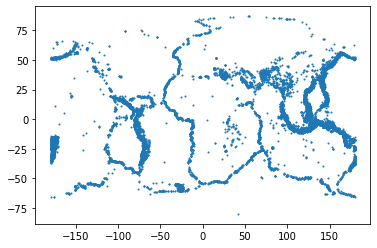

In [34]:
plt.scatter(lon,lat,s=1)

## Subsetting and searching dataframes

In [40]:
## What if I wanted only the earthquake that were magntiude 7 and greater?
## figure out the name of the column with magnitudes...
print(list(quakedf))

## It's 'mag'

## quick note... to get the 0th index of the dataframe, use .loc:
print(quakedf.loc[0:3])

['#time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']
                      #time  latitude  longitude   depth  mag magType  nst  \
0  2018-03-05T22:16:58.450Z   -6.6714    35.3528   10.00  4.5      mb  NaN   
1  2018-03-05T18:33:56.450Z  -19.3775  -179.0281  668.23  4.7      mb  NaN   
2  2018-03-05T15:42:42.630Z   52.5960   160.4379   16.96  5.1     mww  NaN   
3  2018-03-05T13:08:06.560Z  -41.0834   -92.1317   10.00  4.5      mb  NaN   

     gap    dmin   rms  ...                   updated  \
0   90.0   5.053  0.80  ...  2018-03-05T22:35:57.040Z   
1   43.0   3.210  0.97  ...  2018-03-05T19:03:42.040Z   
2   92.0   1.166  1.00  ...  2018-03-05T16:52:37.040Z   
3  183.0  14.696  0.74  ...  2018-03-05T14:35:50.040Z   

                                             place        type  \
0                     69km SW

In [43]:
## Make a new dataframe, a subset, with only the earthquakes M>=7:

## Use .loc, and inside the brackets where we usuallly put the row index, we'll put a search clause 
##   that asks for where (what indices) the dataframe meets certain requirements

## In this case,the requirement is that we want the rows where the values in the magnitude column are >=7
quake_m7_df = quakedf.loc[quakedf.mag >=7]

print(quake_m7_df.shape)
print(quake_m7_df)

(43, 22)
                          #time  latitude  longitude   depth  mag magType  \
193    2018-02-25T17:44:43.920Z   -6.0684   142.7678   23.39  7.5     mww   
297    2018-02-16T23:39:42.210Z   16.6459   -97.6530   24.65  7.2     mww   
709    2018-01-23T09:31:40.890Z   56.0039  -149.1658   14.06  7.9     mww   
843    2018-01-14T09:18:45.540Z  -15.7675   -74.7092   39.00  7.1     mww   
937    2018-01-10T02:51:33.290Z   17.4825   -83.5200   19.00  7.5     mww   
1813   2017-11-19T22:43:29.250Z  -21.3246   168.6715   10.00  7.0     mww   
2052   2017-11-12T18:18:17.180Z   34.9109    45.9592   19.00  7.3     mww   
3075   2017-09-19T18:14:38.090Z   18.5499   -98.4887   48.00  7.1     mww   
3362   2017-09-08T04:49:19.180Z   15.0222   -93.8993   47.39  8.2     mww   
4179   2017-07-17T23:34:13.740Z   54.4434   168.8570   10.00  7.7     mww   
7018   2017-01-22T04:30:22.960Z   -6.2464   155.1718  135.00  7.9     mww   
7225   2017-01-10T06:13:48.140Z    4.4782   122.6171  627.17  7.3  

In [46]:
## This gave me a subset of the original, with just 43 rows. The indices stayed the same!

## What if I wanted to reset the index?
quake_m7_df_resetindex = quake_m7_df.reset_index(drop=True)
print(quake_m7_df_resetindex)

                       #time  latitude  longitude   depth  mag magType  nst  \
0   2018-02-25T17:44:43.920Z   -6.0684   142.7678   23.39  7.5     mww  NaN   
1   2018-02-16T23:39:42.210Z   16.6459   -97.6530   24.65  7.2     mww  NaN   
2   2018-01-23T09:31:40.890Z   56.0039  -149.1658   14.06  7.9     mww  NaN   
3   2018-01-14T09:18:45.540Z  -15.7675   -74.7092   39.00  7.1     mww  NaN   
4   2018-01-10T02:51:33.290Z   17.4825   -83.5200   19.00  7.5     mww  NaN   
5   2017-11-19T22:43:29.250Z  -21.3246   168.6715   10.00  7.0     mww  NaN   
6   2017-11-12T18:18:17.180Z   34.9109    45.9592   19.00  7.3     mww  NaN   
7   2017-09-19T18:14:38.090Z   18.5499   -98.4887   48.00  7.1     mww  NaN   
8   2017-09-08T04:49:19.180Z   15.0222   -93.8993   47.39  8.2     mww  NaN   
9   2017-07-17T23:34:13.740Z   54.4434   168.8570   10.00  7.7     mww  NaN   
10  2017-01-22T04:30:22.960Z   -6.2464   155.1718  135.00  7.9     mww  NaN   
11  2017-01-10T06:13:48.140Z    4.4782   122.6171  6